<a href="https://colab.research.google.com/github/gustavohroos/CNC/blob/main/Relatorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 1 Cálculo Numérico Computacional

---

Nome: Gustavo Henrique Roos <br/>
Matrícula: 20101184

# Métodos para encontrar raízes

Importação de bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sympy import *
from typing import Tuple
import matplotlib.pyplot as plt
import time

## Método da Bissecção

In [ ]:
def bisseccao(f: callable, a: float, b: float, precisao: float) -> Tuple[pd.DataFrame, float]:
    """
    Calculates the root of a given function 'f' in the interval [a, b] using the Bisection method. 
    Returns a tuple containing a DataFrame with the intermediate values calculated during the method 
    and the estimated root 'x' with a given 'precisao'.

    :param f: A callable function that receives a float and returns a float.
    :param a: A float representing the left endpoint of the interval.
    :param b: A float representing the right endpoint of the interval.
    :param precisao: A float representing the desired precision of the estimated root.

    :return: A tuple containing a Pandas DataFrame with the intermediate values calculated during the method 
             and a float representing the estimated root 'x'.
    """
    
    if f(a)*f(b) > 0:
        return None

    x = np.mean([a, b])

    data = {
        "a": [a],
        "b": [b],
        "x": [x],
        "f(x)": [f(x)]
    }

    while abs(f(x)) > precisao:
        
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x

        x = np.mean([a, b])

        data["x"].append(x)
        data["a"].append(a)
        data["b"].append(b)
        data["f(x)"].append(f(x))

    return pd.DataFrame(data), x

## Método da Falsa Posição

In [ ]:
def falsa_posicao(f: callable, a: float, b: float, p: float) -> Tuple[pd.DataFrame, float]:
    """
    Calculates the root of a given function 'f' in the interval [a, b] using the False Position method. 
    Returns a tuple containing a DataFrame with the intermediate values calculated during the method 
    and the estimated root 'x' with a given precision.

    :param f: A callable function that receives a float and returns a float.
    :param a: A float representing the left endpoint of the interval.
    :param b: A float representing the right endpoint of the interval.
    :param p: A float representing the desired precision of the estimated root.

    :return: A tuple containing a Pandas DataFrame with the intermediate values calculated during the method 
             and a float representing the estimated root 'x'.
    """

    x = (a * f(b) - b * f(a)) / (f(b) - f(a))

    data = {
        "a": [a],
        "b": [b],
        "x": [x],
        "f(x)": [f(x)]
    }

    if f(a)*f(b) > 0:
        return None

    if abs(f(a)) < p: 
        return pd.DataFrame(data), a
    elif abs(f(b)) < p: 
        return pd.DataFrame(data), b

    while abs(f(x)) > p:
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        
        x = (a * f(b) - b * f(a)) / (f(b) - f(a))

        data["x"].append(x)
        data["a"].append(a)
        data["b"].append(b)
        data["f(x)"].append(f(x))

    return pd.DataFrame(data), x

## Método de Newton-Raphson

In [ ]:
def newton_raphson(f: callable, f_derivada, x_0: float, p: float) -> Tuple[pd.DataFrame, float]:
    """
    Calculates the root of a given function 'f' using the Newton-Raphson method. 
    Returns a tuple containing a DataFrame with the intermediate values calculated during the method 
    and the estimated root 'x' with a given 'precisao'.

    :param f: A callable function that receives a float and returns a float. It represents the function whose root 
              is to be found.
    :param x_0: A float representing the initial guess for the root.
    :param p: A float representing the desired precision of the estimated root.

    :return: A tuple containing a Pandas DataFrame with the intermediate values calculated during the method 
             and a float representing the estimated root 'x'.
    """  

    data = {
        "x": [x_0],
        "d(x)": [f_derivada(x_0)],
        "f(x)": [f(x_0)]
    }

    while abs(f(x_0)) > p:
        
        x_1 = x_0 - f(x_0) / f_derivada(x_0)

        x_0 = x_1

        data["x"].append(x_1)
        data["d(x)"].append(f_derivada(x_1))
        data["f(x)"].append(f(x_1))

    return pd.DataFrame(data), x_0

## Método da Secante

In [ ]:
def secante(f: callable, x_0: float, x_1: float, p: float) -> Tuple[pd.DataFrame, float]:
    """
    Calculates the root of a given function 'f' using the secant method starting with initial values 'x_0' and 'x_1'.
    Returns a tuple containing a DataFrame with the intermediate values calculated during the method and the estimated
    root 'x_2' with a given 'precisao'.

    :param f: A callable function that receives a float and returns a float.
    :param x_0: A float representing the first initial value of the root.
    :param x_1: A float representing the second initial value of the root.
    :param p: A float representing the desired precision of the estimated root.

    :return: A tuple containing a Pandas DataFrame with the intermediate values calculated during the method 
             and a float representing the estimated root 'x_2'.
    """

    if abs(f(x_0)) < p:
        return x_0

    if abs(f(x_1)) < p:
        return x_1

    x_2 = x_1 - ((f(x_1)) / (f(x_1) - f(x_0))) * (x_1 - x_0)

    data = {
        "x_0": [x_0],
        "x_1": [x_1],
        "x_2": [x_2],
        "f(x_2)": [f(x_2)]
    }
    
    while abs(f(x_2)) > p:

        x_2 = x_1 - ((f(x_1)) / (f(x_1) - f(x_0))) * (x_1 - x_0)
        x_0 = x_1
        x_1 = x_2

        data["x_0"].append(x_0)
        data["x_1"].append(x_1)
        data["x_2"].append(x_2)
        data["f(x_2)"].append(f(x_2))

    return pd.DataFrame(data), x_2

# Relatório

## 1

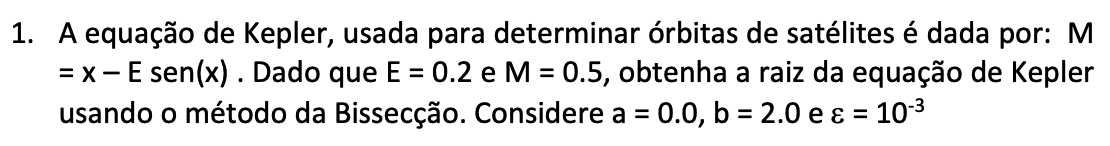

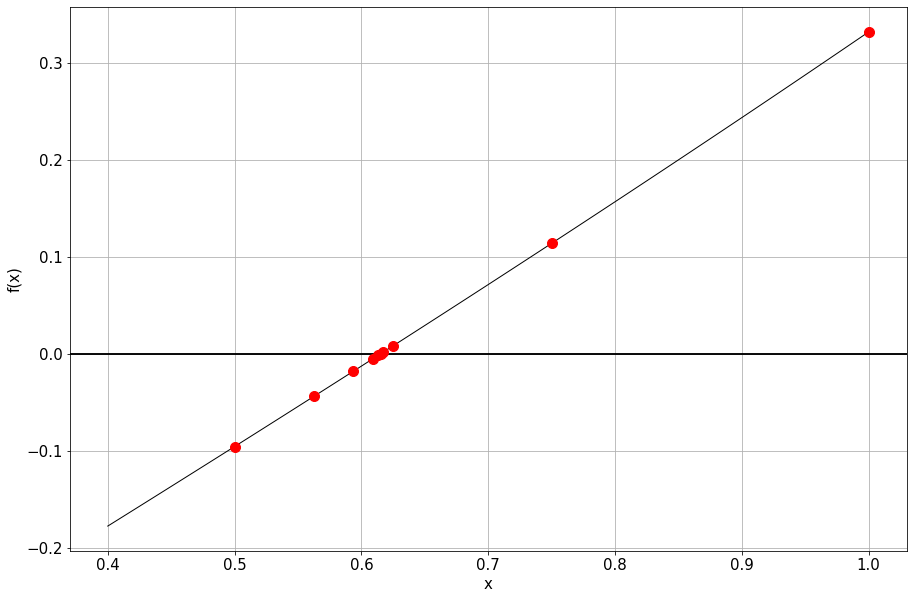

In [ ]:
# M = x - E * np.sin(x)
E_1 = 0.2
M_1 = 0.5
a_1 = 0.0
b_1 = 2.0
epsilon = 10 ** -3

f_1 = lambda x : x - E_1 * np.sin(x) - M_1



data, x = bisseccao(f_1, a_1, b_1, epsilon)

raizes = [f_1(valor) for valor in data['x']]

inicio = 0.4
fim = 1
quantidade = 100

curva = np.linspace(inicio, fim, quantidade)
valores = [f_1(valor) for valor in curva]


plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 15})


plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(curva, valores, ls='-', linewidth=1, color="#000000")

plt.axhline(y=0, color="#000000")
plt.axhline(color="#000000")

plt.plot(data['x'], raizes, 'ro', markersize=10)


plt.grid()

## 2

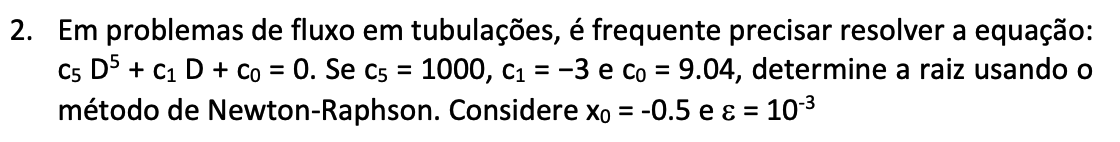

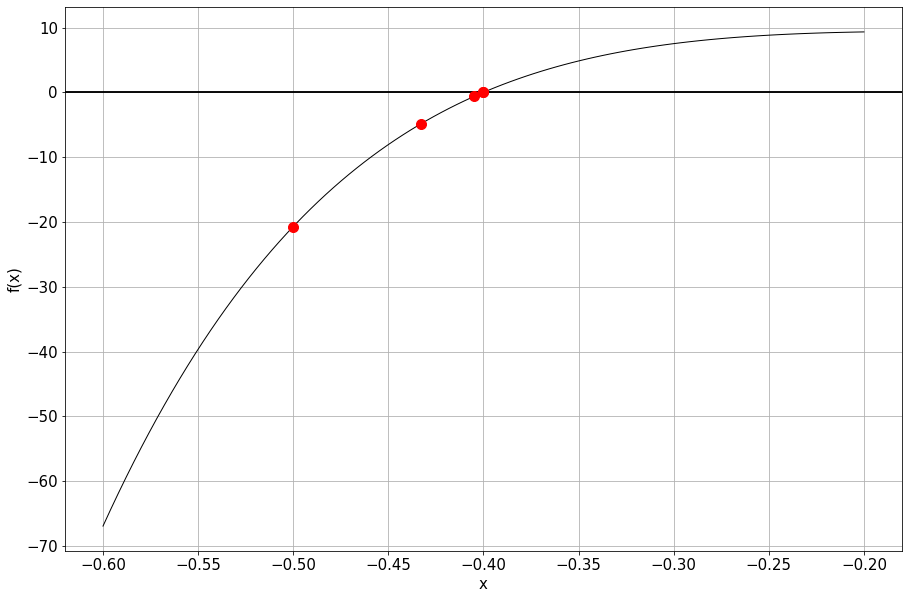

In [ ]:
# c5 * D ** 5 + c1 * D + c0 = 0
c5 = 1000
c1 = -3
c0 = 9.04
x_0_2 = -0.5
epsilon = 10 ** -3

f_2 = lambda D : c5 * D ** 5 + c1 * D + c0

D = Symbol('D')
f_2 = c5 * D ** 5 + c1 * D + c0

df = f_2.diff(D)
f_2 = lambdify(D, f_2)
f_2_derivada = lambdify(D, df)


data, x = newton_raphson(f_2, f_2_derivada, x_0_2, epsilon)

raizes = [f_2(valor) for valor in data['x']]

inicio = -0.6
fim = -0.2
quantidade = 100

curva = np.linspace(inicio, fim, quantidade)
valores = [f_2(valor) for valor in curva]

plt.figure(figsize=(15, 10))

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(curva, valores, ls='-', linewidth=1, color="#000000")

plt.axhline(y=0, color="#000000")
plt.axhline(color="#000000")

plt.plot(data['x'], raizes, 'ro', markersize=10)

plt.grid()

## 3

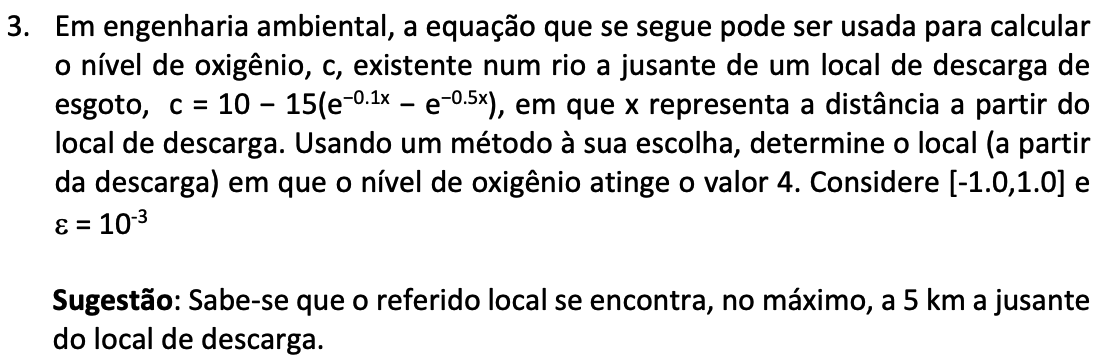

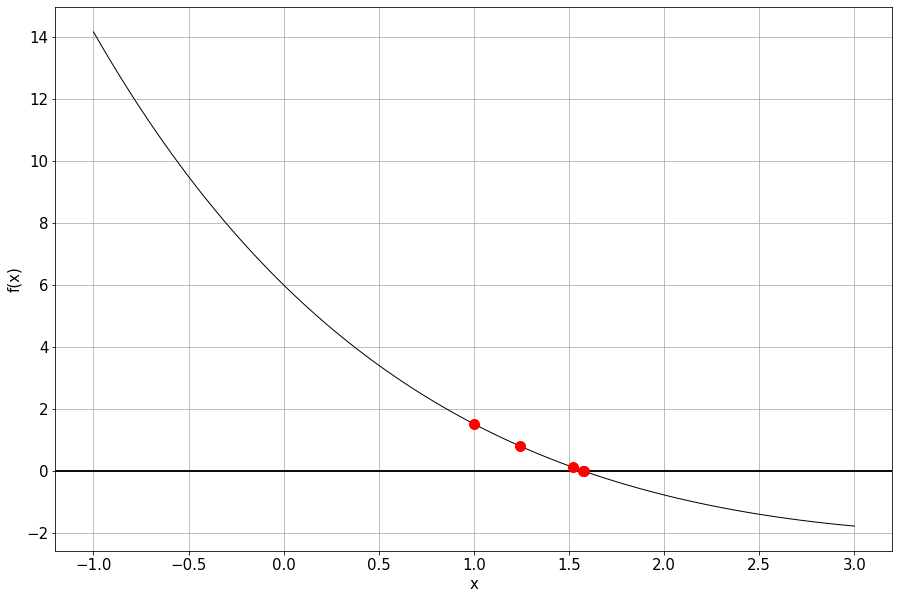

In [ ]:
f_3 = lambda x : 10 - 15 * (np.exp(-0.1 * x) - np.exp(-0.5 * x)) - 4
x_0_3 = -1
x_1_3 = 1
epsilon = 10 ** -3

data, x = secante(f_3, x_0_3, x_1_3, epsilon)

raizes = [f_3(valor) for valor in data['x_1']]

inicio = -1
fim = 3
quantidade = 100

curva = np.linspace(inicio, fim, quantidade)
valores = [f_3(valor) for valor in curva]

plt.figure(figsize=(15, 10))

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(curva, valores, ls='-', linewidth=1, color="#000000")

plt.axhline(y=0, color="#000000")
plt.axhline(color="#000000")

plt.plot(data['x_1'], raizes, 'ro', markersize=10)

plt.grid()

## 4
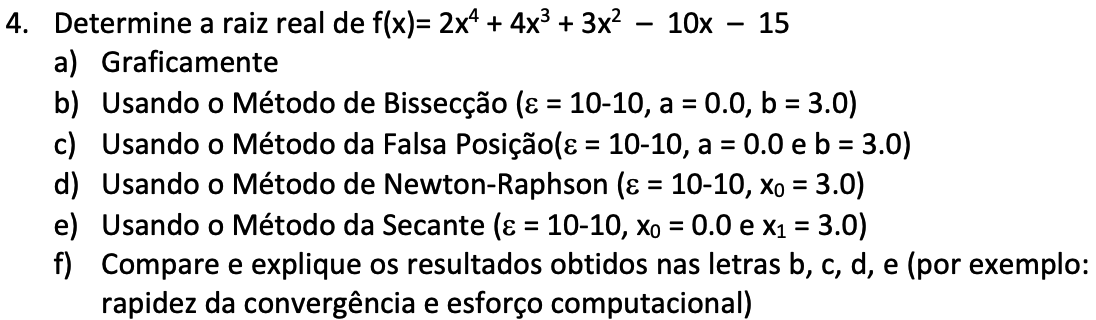

### a) Graficamente

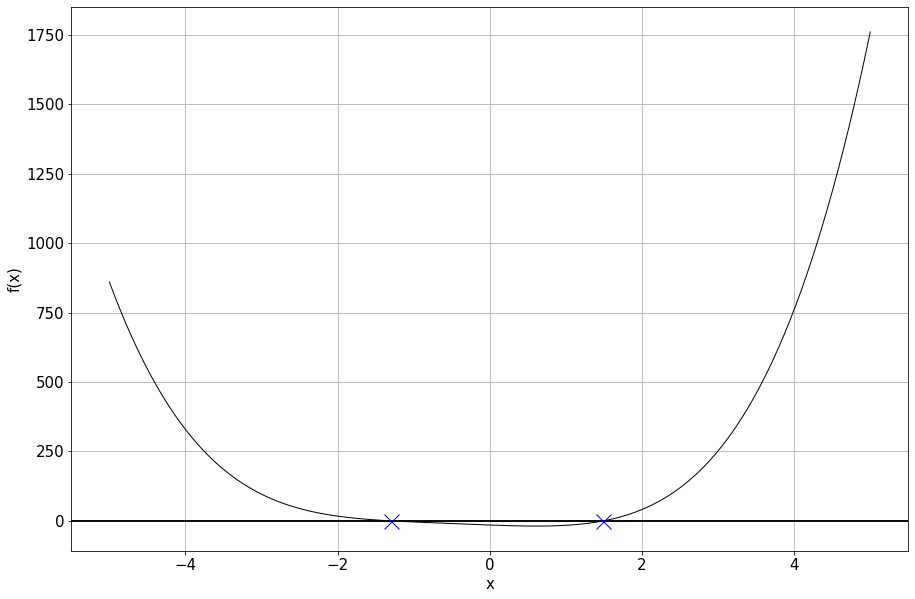

In [ ]:
# f(x) = 2 * x ** 4 + 4 * x ** 3 + 3 * x ** 2 - 10 * x - 15

epsilon_4 = 10 ** -10

f_4 = lambda x : 2 * x ** 4 + 4 * x ** 3 + 3 * x ** 2 - 10 * x - 15

inicio = -5
fim = 5
quantidade = 1000

curva = np.linspace(inicio, fim, quantidade)
valores = [f_4(valor) for valor in curva]

plt.figure(figsize=(15, 10))

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(curva, valores, ls='-', linewidth=1, color="#000000")

plt.axhline(y=0, color="#000000")
plt.axhline(color="#000000")

plt.plot([-1.3004, 1.4929], [f_4(x) for x in [-1.3004, 1.4929]], 'bx', markersize=15)

plt.grid()

No gráfico, em X azul estão as raízes reais da função.

### b) Usando o Método de Bissecção

In [ ]:
a_4_b = 0
b_4_b = 3

inicio_4_b = time.time()
data_4_b, x_4_b = bisseccao(f_4, a_4_b, b_4_b, epsilon_4)
tempo_4_b = time.time() - inicio_4_b

data_4_b

,a,b,x,f(x)
0,0.000000,3.000000,1.500000,3.750000e-01
1,0.000000,1.500000,0.750000,-1.849219e+01
2,0.750000,1.500000,1.125000,-1.355420e+01
3,1.125000,1.500000,1.312500,-7.977997e+00
4,1.312500,1.500000,1.406250,-4.184904e+00
5,1.406250,1.500000,1.453125,-2.005545e+00
6,1.453125,1.500000,1.476562,-8.410257e-01
7,1.476562,1.500000,1.488281,-2.395277e-01
8,1.488281,1.500000,1.494141,6.609786e-02
9,1.488281,1.494141,1.491211,-8.712328e-02


### c) Usando o Método da Falsa Posição

In [ ]:
a_4_c = 0
b_4_c = 3

inicio_4_c = time.time()
data_4_c, x_4_c = falsa_posicao(f_4, a_4_c, b_4_c, epsilon_4)
tempo_4_c = time.time() - inicio_4_c
data_4_c

,a,b,x,f(x)
0,0.000000,3,0.168539,-1.657941e+01
1,0.168539,3,0.343325,-1.788998e+01
2,0.343325,3,0.519426,-1.867869e+01
3,0.519426,3,0.690603,-1.870282e+01
4,0.690603,3,0.850159,-1.783061e+01
...,...,...,...,...
73,1.492879,3,1.492879,-3.151452e-10
74,1.492879,3,1.492879,-2.165432e-10
75,1.492879,3,1.492879,-1.487930e-10
76,1.492879,3,1.492879,-1.022276e-10


### d) Usando o Método de Newton-Raphson

In [ ]:
x_0_4_d = 3

x = Symbol('x')
f_4 = 2 * x ** 4 + 4 * x ** 3 + 3 * x ** 2 - 10 * x - 15

df_4 = f_4.diff(x)
f_4 = lambdify(x, f_4)
f_4_derivada = lambdify(x, df_4)

inicio_4_d = time.time()
data_4_d, x_4_d = newton_raphson(f_4, f_4_derivada, x_0_4_d, epsilon_4)
tempo_4_d = time.time() - inicio_4_d

data_4_d

,x,d(x),f(x)
0,3.000000,332.000000,2.520000e+02
1,2.240964,153.740323,7.311122e+01
2,1.765414,82.010639,1.813234e+01
3,1.544316,57.349336,2.819436e+00
4,1.495154,52.535897,1.192803e-01
5,1.492883,52.319236,2.460535e-04
6,1.492879,52.318787,1.054104e-09
7,1.492879,52.318787,1.776357e-15


### e) Usando o Método da Secante

In [ ]:
x_0_4_e = 0
x_1_4_e = 3

inicio_4_e = time.time()
data_4_e, x_4_e = secante(f_4, x_0_4_e, x_1_4_e, epsilon_4)
tempo_4_e = time.time() - inicio_4_e

data_4_e

,x_0,x_1,x_2,f(x_2)
0,0.000000,3.000000,0.168539,-1.657941e+01
1,3.000000,0.168539,0.168539,-1.657941e+01
2,0.168539,0.343325,0.343325,-1.788998e+01
3,0.343325,-2.042612,-2.042612,1.866923e+01
4,-2.042612,-0.824215,-0.824215,-6.036531e+00
5,-0.824215,-1.121915,-1.121915,-2.484741e+00
6,-1.121915,-1.330178,-1.330178,4.569361e-01
7,-1.330178,-1.297828,-1.297828,-3.855290e-02
8,-1.297828,-1.300345,-1.300345,-5.904546e-04
9,-1.300345,-1.300384,-1.300384,7.676532e-07


### f) Compare e explique os resultados


In [ ]:
print('Raízes encontradas:')
print(f'Método de Bissecção:      {x_4_b}')
print(f'Método da Falsa Posição:  {x_4_c}')
print(f'Método de Newton-Raphson: {x_4_d}')
print(f'Método da Secante:        {x_4_e}')
print('\nQuantidade de iterações:')
print(f'Método de Bissecção:      {len(data_4_b)}')
print(f'Método da Falsa Posição:  {len(data_4_c)}')
print(f'Método de Newton-Raphson: {len(data_4_d)}')
print(f'Método da Secante:        {len(data_4_e)}')
print('\nTempo de execução:')
print(f'Método de Bissecção:      {tempo_4_b:.5f}s')
print(f'Método da Falsa Posição:  {tempo_4_c:.5f}s')
print(f'Método de Newton-Raphson: {tempo_4_d:.5f}s')
print(f'Método da Secante:        {tempo_4_e:.5f}s')

Raízes encontradas:
Método de Bissecção:      1.492878708664648
Método da Falsa Posição:  1.492878708662261
Método de Newton-Raphson: 1.4928787086636037
Método da Secante:        -1.3003841326429082

Quantidade de iterações:
Método de Bissecção:      38
Método da Falsa Posição:  78
Método de Newton-Raphson: 8
Método da Secante:        11

Tempo de execução:
Método de Bissecção:      0.00324s
Método da Falsa Posição:  0.00241s
Método de Newton-Raphson: 0.00410s
Método da Secante:        0.00305s


Apesar do método de Newton-Raphson ter encontrado uma raíz diferente das encontradas pelos outros métodos, esta raíz também é válida, visto que a curva passa duas vezes pelo eixo das abcissas. O motivo de ter encontrado uma raíz diferente provavelmente deve-se aos parâmetros iniciais passados para o algoritmo. O tempo de execução varia entre os métodos porém por ser muito pequeno acaba não influenciando na escolha do método ideal para esta função.

## 5

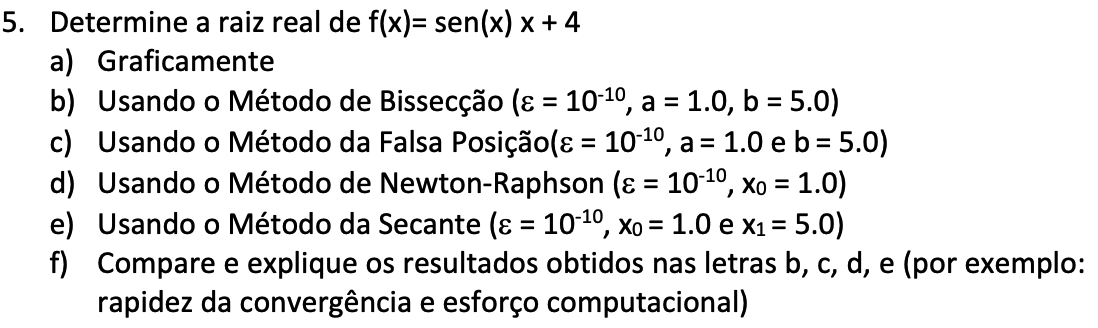

### a) Graficamente

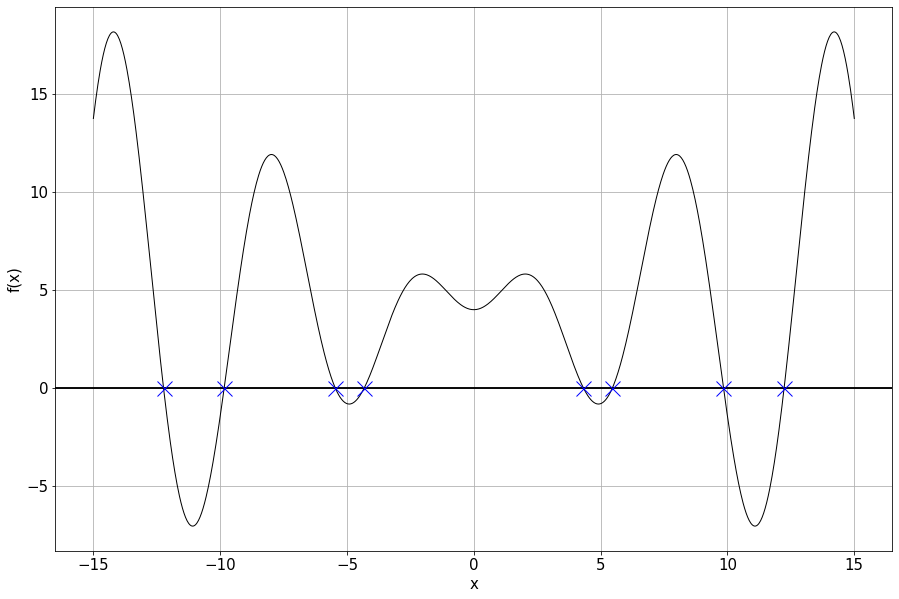

In [ ]:
# f(x) = np.sin(x) * x + 4

f_5 = lambda x : np.sin(x) * x + 4 

inicio = -15
fim = 15
quantidade = 1000

curva = np.linspace(inicio, fim, quantidade)
valores = [f_5(valor) for valor in curva]

plt.figure(figsize=(15, 10))

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(curva, valores, ls='-', linewidth=1, color="#000000")

plt.axhline(y=0, color="#000000")
plt.axhline(color="#000000")

raizes_aproximadas = [4.32323954371371, -4.32323954371371,
                      5.46130801258900, -5.46130801258900,
                      9.84325527105587, -9.84325527105587,
                      12.2332673961679, -12.2332673961679]

plt.plot(raizes_aproximadas, [f_5(x) for x in raizes_aproximadas], 'bx', markersize=15)

plt.grid()

No gráfico, em X azul estão as raízes reais da função.

### b) Usando o Método de Bissecção

In [ ]:
epsilon_5 = 10 ** -10
a_5_b = 1
b_5_b = 5

inicio_5_b = time.time()
data_5_b, x_5_b = bisseccao(f_5, a_5_b, b_5_b, epsilon_5)
tempo_5_b = time.time() - inicio_5_b

data_5_b

,a,b,x,f(x)
0,1.000000,5.000000,3.000000,4.423360e+00
1,3.000000,5.000000,4.000000,9.727900e-01
2,4.000000,5.000000,4.500000,-3.988855e-01
3,4.000000,4.500000,4.250000,1.962952e-01
4,4.250000,4.500000,4.375000,-1.283471e-01
5,4.250000,4.375000,4.312500,2.773805e-02
6,4.312500,4.375000,4.343750,-5.193100e-02
7,4.312500,4.343750,4.328125,-1.249476e-02
8,4.312500,4.328125,4.320312,7.523127e-03
9,4.320312,4.328125,4.324219,-2.510576e-03


### c) Usando o Método da Falsa Posição

In [ ]:
a_5_c = 1
b_5_c = 5

inicio_5_c = time.time()
data_5_c, x_5_c = falsa_posicao(f_5, a_5_c, b_5_c, epsilon_5)
tempo_5_c = time.time() - inicio_5_c

data_5_c

,a,b,x,f(x)
0,1.000000,5.000000,4.436048,-2.677452e-01
1,1.000000,4.436048,4.255984,1.796467e-01
2,4.255984,4.436048,4.328287,-1.290864e-02
3,4.255984,4.328287,4.323440,-5.148238e-04
4,4.255984,4.323440,4.323247,-2.036658e-05
5,4.255984,4.323247,4.323240,-8.054491e-07
6,4.255984,4.323240,4.323240,-3.185316e-08
7,4.255984,4.323240,4.323240,-1.259698e-09
8,4.255984,4.323240,4.323240,-4.981615e-11


### d) Usando o Método de Newton-Raphson

In [ ]:
x_0_5_d = 1

x = Symbol('x')
f_5_d = sin(x) * x + 4

df_5 = f_5_d.diff(x)
f_5_d = lambdify(x, f_5_d)
f_5_derivada = lambdify(x, df_5)

inicio_5_d = time.time()
data_5_d, x_5_d = newton_raphson(f_5, f_5_derivada, x_0_5_d, epsilon_5)
tempo_5_d = time.time() - inicio_5_d

data_5_d

,x,d(x),f(x)
0,1.000000,1.381773,4.841471e+00
1,-2.503810,1.416190,5.490807e+00
2,-6.380978,-6.448127,4.623016e+00
3,-5.664023,-4.032227,7.128649e-01
4,-5.487231,-3.124352,7.919958e-02
5,-5.461882,-2.988968,1.713747e-03
6,-5.461308,-2.985894,8.812026e-07
7,-5.461308,-2.985892,2.331468e-13


### e) Usando o Método da Secante

In [ ]:
x_0_5_e = 1
x_1_5_e = 5

inicio_5_e = time.time()
data_5_e, x_5_e = secante(f_5, x_0_5_e, x_1_5_e, epsilon_5)
tempo_5_e = time.time() - inicio_5_e

data_5_e

,x_0,x_1,x_2,f(x_2)
0,1.000000,5.000000,4.436048,-2.677452e-01
1,5.000000,4.436048,4.436048,-2.677452e-01
2,4.436048,4.149462,4.149462,4.908143e-01
3,4.149462,4.334893,4.334893,-2.967543e-02
4,4.334893,4.324321,4.324321,-2.771907e-03
5,4.324321,4.323231,4.323231,2.070461e-05
6,4.323231,4.323240,4.323240,-1.415748e-08
7,4.323240,4.323240,4.323240,-7.194245e-14


### f) Compare e explique os resultados


In [ ]:
print('Raízes encontradas:')
print(f'Método de Bissecção:      {x_5_b}')
print(f'Método da Falsa Posição:  {x_5_c}')
print(f'Método de Newton-Raphson: {x_5_d}')
print(f'Método da Secante:        {x_5_e}')
print('\nQuantidade de iterações:')
print(f'Método de Bissecção:      {len(data_5_b)}')
print(f'Método da Falsa Posição:  {len(data_5_c)}')
print(f'Método de Newton-Raphson: {len(data_5_d)}')
print(f'Método da Secante:        {len(data_5_e)}')
print('\nTempo de execução:')
print(f'Método de Bissecção:      {tempo_5_b:.5f}s')
print(f'Método da Falsa Posição:  {tempo_5_c:.5f}s')
print(f'Método de Newton-Raphson: {tempo_5_d:.5f}s')
print(f'Método da Secante:        {tempo_5_e:.5f}s')




Raízes encontradas:
Método de Bissecção:      4.323239543708041
Método da Falsa Posição:  4.323239543733132
Método de Newton-Raphson: -5.461308012589076
Método da Secante:        4.3232395437137425

Quantidade de iterações:
Método de Bissecção:      34
Método da Falsa Posição:  9
Método de Newton-Raphson: 8
Método da Secante:        8

Tempo de execução:
Método de Bissecção:      0.00321s
Método da Falsa Posição:  0.00165s
Método de Newton-Raphson: 0.00123s
Método da Secante:        0.00160s


Assim como na função do exercício 4, mais de uma raíz pode ser encontrada para satisfazer a função, o que pode ser observado no gráfico. Por esse motivo, o método de Newton-Raphson encontrou uma raíz diferente dos demais métodos, o que novamente pode ser entendido como consequência dos parâmetros de entrada do algoritmo.